In [2]:
import numpy as np # linear algebra
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn import metrics

import logging,sys


In [3]:
df = pd.read_csv("binary.csv")



In [4]:
df["rank"].describe()

count    400.00000
mean       2.48500
std        0.94446
min        1.00000
25%        2.00000
50%        2.00000
75%        3.00000
max        4.00000
Name: rank, dtype: float64

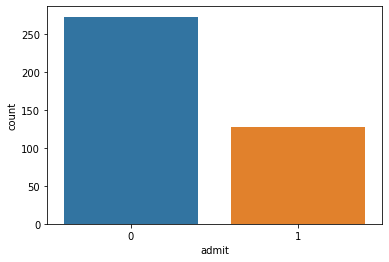

In [5]:
import seaborn as sns
sns.countplot(x="admit",data=df)

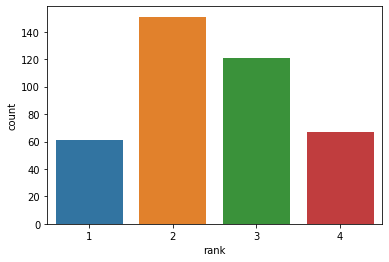

In [6]:
sns.countplot(x="rank",data=df)

In [7]:
df["rank"].value_counts()

2    151
3    121
4     67
1     61
Name: rank, dtype: int64

In [8]:
df["rank"].unique()

array([3, 1, 4, 2])

In [9]:

#Splitting independent data and targeted data as test and train
X_train, X_test, Y_train, Y_test= train_test_split(df[["gpa","gre","rank"]],
                                                   df[["admit"]],test_size=0.2,
                                                   random_state=66)


In [10]:
from sklearn.ensemble import AdaBoostClassifier
clf_entropy = AdaBoostClassifier (n_estimators = 20)

clf_entropy.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=20, random_state=None)

In [11]:

#predicting test data values for clf_entropy model
predicted_entropy = clf_entropy.predict(X_test)

In [12]:
#Confusion Matrix
from  sklearn.metrics import confusion_matrix 
cM = confusion_matrix(Y_test,predicted_entropy)
print(cM)
#generic matrix
tp, fp, fn, tn = cM.ravel()
recall = tp/(tp+fn)
precision=tp/(tp+fp)
print("Recall = Sensitivity = ",tp/(tp+fn))
print("Specificity =", tn/(tn+fp))
print("Accuracy=",(tp+tn)/(tp+tn+fp+fn))
print("Precision=",tp/(tp+fp))
f1score= 2 *(recall*precision)/(precision+recall)
print("f1 score=", f1score)


[[52  8]
 [10 10]]
Recall = Sensitivity =  0.8387096774193549
Specificity = 0.5555555555555556
Accuracy= 0.775
Precision= 0.8666666666666667
f1 score= 0.8524590163934426


In [13]:
clf_entropy.estimator_weights_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [14]:
clf_entropy.estimator_errors_

array([0.334375  , 0.39136438, 0.45869295, 0.4619066 , 0.44852552,
       0.46547136, 0.46323337, 0.47694754, 0.47402706, 0.46591891,
       0.45755907, 0.45686886, 0.48679653, 0.4866632 , 0.48683058,
       0.48162898, 0.48989019, 0.48734242, 0.48829007, 0.49115514])

[Text(167.4, 163.07999999999998, 'X[0] <= 3.235\ngini = 0.5\nsamples = 320\nvalue = [0.5, 0.5]'),
 Text(83.7, 54.360000000000014, 'gini = 0.493\nsamples = 114\nvalue = [0.153, 0.195]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.498\nsamples = 206\nvalue = [0.347, 0.305]')]

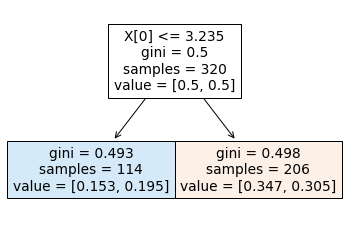

In [20]:
from sklearn.tree import plot_tree
plot_tree(clf_entropy.estimators_[10],filled=True) 